<h1>Buttefly Classification </h1>
it is the dataset of the butterflies from kaggle has aroung 6.5k train images. There labels are in the csv file having 2 columns image id and butterfly name

In [1]:
# some libraries 
import os 
import numpy as np
import pandas as pd
import shutil


In [2]:
# importing the csv file to see it
label_file = pd.read_csv("Raw_Data/Training_set.csv")
label_file

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
...,...,...
6494,Image_6495.jpg,MANGROVE SKIPPER
6495,Image_6496.jpg,MOURNING CLOAK
6496,Image_6497.jpg,APPOLLO
6497,Image_6498.jpg,ELBOWED PIERROT


In [22]:
# printing the unique names from the csv as the labels
labels = label_file['label'].unique()
print(labels)
print("Total Labels / classes: ",len(labels))

['SOUTHERN DOGFACE' 'ADONIS' 'BROWN SIPROETA' 'MONARCH'
 'GREEN CELLED CATTLEHEART' 'CAIRNS BIRDWING' 'EASTERN DAPPLE WHITE'
 'RED POSTMAN' 'MANGROVE SKIPPER' 'BLACK HAIRSTREAK' 'CABBAGE WHITE'
 'RED ADMIRAL' 'PAINTED LADY' 'PAPER KITE' 'SOOTYWING' 'PINE WHITE'
 'PEACOCK' 'CHECQUERED SKIPPER' 'JULIA' 'COMMON WOOD-NYMPH' 'BLUE MORPHO'
 'CLOUDED SULPHUR' 'STRAITED QUEEN' 'ORANGE OAKLEAF' 'PURPLISH COPPER'
 'ATALA' 'IPHICLUS SISTER' 'DANAID EGGFLY' 'LARGE MARBLE'
 'PIPEVINE SWALLOW' 'BLUE SPOTTED CROW' 'RED CRACKER' 'QUESTION MARK'
 'CRIMSON PATCH' 'BANDED PEACOCK' 'SCARCE SWALLOW' 'COPPER TAIL'
 'GREAT JAY' 'INDRA SWALLOW' 'VICEROY' 'MALACHITE' 'APPOLLO'
 'TWO BARRED FLASHER' 'MOURNING CLOAK' 'TROPICAL LEAFWING' 'POPINJAY'
 'ORANGE TIP' 'GOLD BANDED' 'BECKERS WHITE' 'RED SPOTTED PURPLE'
 'MILBERTS TORTOISESHELL' 'SILVER SPOT SKIPPER' 'AMERICAN SNOOT' 'AN 88'
 'ULYSES' 'COMMON BANDED AWL' 'CRECENT' 'METALMARK' 'SLEEPY ORANGE'
 'PURPLE HAIRSTREAK' 'ELBOWED PIERROT' 'GREAT EGGFLY' 'ORCHARD 

In [33]:
print(['label'].value_counts())

MOURNING CLOAK    131
SLEEPY ORANGE     107
ATALA             100
BROWN SIPROETA     99
CRECENT            97
                 ... 
AMERICAN SNOOT     74
GOLD BANDED        73
MALACHITE          73
CRIMSON PATCH      72
WOOD SATYR         71
Name: label, Length: 75, dtype: int64


I am going to make folders for each class for better work 
<br> As we have 6499 total image so 20%  will go for validation which are 1300

In [150]:
# list of the training file and labels
training_file = list(label_file['filename'][:5199])
training_lable = list(label_file['label'][:5199])

In [151]:
# lists of the validation file and labels
validation_file = list(label_file['filename'][5199:])
validation_label = list(label_file['label'][5199:])

In [156]:
# making folder for training 
train_dir = os.mkdir("Train Dir")
for i in labels:
    os.mkdir("Train Dir/"+i) # all the folder have been created

# folder for validatio
val_dir = os.mkdir("Val Dir")
for i in labels:
    os.mkdir("Val Dir/"+i) # all the folder have been created


In [157]:
# Shifting the images 
source_dir = "Raw_Data/train"
des_dir = "Train Dir"
des_2 = "Val Dir"
for i in range(0 ,len(training_file) ):
    des_dir2 = os.path.join(des_dir , training_lable[i],training_file[i])
    sour_path2 = os.path.join(source_dir,training_file[i])
    shutil.copy(sour_path2 , des_dir2)
    
    

In [158]:
for i in range(0 ,len(validation_file) ):
    des_dir2 = os.path.join(des_2 , validation_label[i],validation_file[i])
    sour_path2 = os.path.join(source_dir,validation_file[i])
    shutil.copy(sour_path2 , des_dir2)
    

In [123]:
shutil.rmtree("Train Dir")

In [160]:
# checking the number of images in each folder
sub_val = [f.path for f in os.scandir("Train Dir") if f.is_dir()]
for s in sub_val:
    image_count = len([f for f in os.listdir(s)])
    print("in ",s ,"number of images ",image_count)

in  Train Dir\ADONIS number of images  79
in  Train Dir\AFRICAN GIANT SWALLOWTAIL number of images  65
in  Train Dir\AMERICAN SNOOT number of images  60
in  Train Dir\AN 88 number of images  69
in  Train Dir\APPOLLO number of images  75
in  Train Dir\ATALA number of images  80
in  Train Dir\BANDED ORANGE HELICONIAN number of images  73
in  Train Dir\BANDED PEACOCK number of images  71
in  Train Dir\BECKERS WHITE number of images  64
in  Train Dir\BLACK HAIRSTREAK number of images  69
in  Train Dir\BLUE MORPHO number of images  62
in  Train Dir\BLUE SPOTTED CROW number of images  63
in  Train Dir\BROWN SIPROETA number of images  76
in  Train Dir\CABBAGE WHITE number of images  73
in  Train Dir\CAIRNS BIRDWING number of images  66
in  Train Dir\CHECQUERED SKIPPER number of images  72
in  Train Dir\CHESTNUT number of images  68
in  Train Dir\CLEOPATRA number of images  64
in  Train Dir\CLODIUS PARNASSIAN number of images  74
in  Train Dir\CLOUDED SULPHUR number of images  67
in  Train Dir

<h1>Images are stored in respected folders </h1>
Now it is time to preprocess them uising imagedatagenerator

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras import optimizers 
from keras.constraints import maxnorm


In [4]:
base_train_dir = "Train Dir"
base_val_dir = "Val Dir"

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    base_train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="categorical"
)



val_datagen = ImageDataGenerator(rescale=1/255)

val_generator = val_datagen.flow_from_directory(
    base_val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="categorical"
)



Found 5199 images belonging to 75 classes.
Found 1300 images belonging to 75 classes.


Making Simple CNN Model

In [6]:
model= Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dense(75,activation = 'softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [34]:
# compiling the model
model.compile(loss = "categorical_crossentropy",optimizer = optimizers.Adam(learning_rate=0.001),metrics= ['acc'])


In [35]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs = 30,
                    validation_data = val_generator,
                    validation_steps = len(val_generator))

Epoch 1/30
163/163 [==============================] - 163s 993ms/step - loss: 4.1999 - acc: 0.0321 - val_loss: 3.7517 - val_acc: 0.1100
Epoch 2/30
163/163 [==============================] - 127s 774ms/step - loss: 3.0349 - acc: 0.2250 - val_loss: 2.3598 - val_acc: 0.3862
Epoch 3/30
163/163 [==============================] - 130s 800ms/step - loss: 2.0404 - acc: 0.4453 - val_loss: 1.9927 - val_acc: 0.4546
Epoch 4/30
163/163 [==============================] - 134s 820ms/step - loss: 1.4591 - acc: 0.5947 - val_loss: 1.7376 - val_acc: 0.5092
Epoch 5/30
163/163 [==============================] - 129s 788ms/step - loss: 0.9615 - acc: 0.7226 - val_loss: 1.7734 - val_acc: 0.5546
Epoch 6/30
163/163 [==============================] - 130s 798ms/step - loss: 0.6600 - acc: 0.8019 - val_loss: 1.8498 - val_acc: 0.5608
Epoch 7/30
163/163 [==============================] - 129s 791ms/step - loss: 0.4687 - acc: 0.8584 - val_loss: 1.9585 - val_acc: 0.5608
Epoch 8/30
163/163 [============================

Ploting the Results

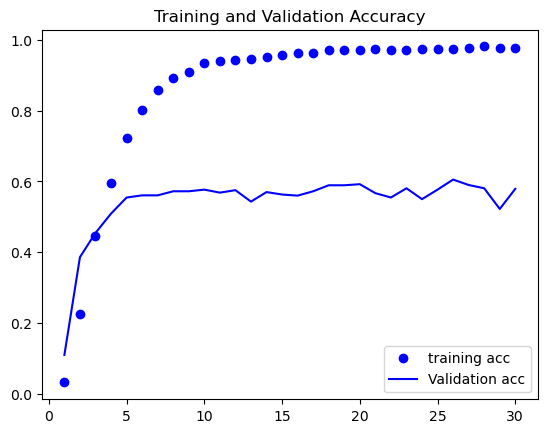

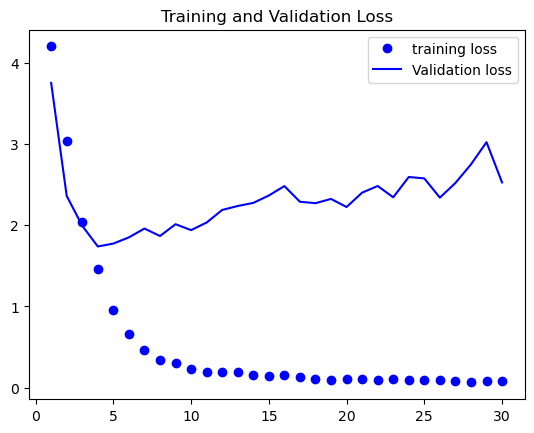

In [36]:
import matplotlib.pyplot as plt
#plotting the results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs , acc, 'bo',label ="training acc")
plt.plot(epochs , val_acc, 'b',label ="Validation acc")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

plt.plot(epochs , loss, 'bo',label ="training loss")
plt.plot(epochs , val_loss, 'b',label ="Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [53]:
from tensorflow.keras.preprocessing import image
# Load and preprocess the custom image
custom_image_path = 'C:/Users/dell/Downloads/large.jpeg'
img = image.load_img(custom_image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values

In [54]:
result = model.predict(img_array)
max_index = np.argmax(result)
max_value = result[0][max_index]
print("Max value:", max_value)
print("MAx index",max_index)

1/1 [==============================] - 0s 32ms/step
Max value: 0.7402666
MAx index 38


In [55]:

directory = "Train Dir"  
items = os.listdir(directory)
print(items[38])


LARGE MARBLE


In [60]:
model.save("Simple_ButterFly_Classification_Model.h5")

<h2>Making the new model with some twiking </h2>
The new model is made by using the Pre-trained VGG16 Model

In [38]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3)) 

In [56]:
modelv = Sequential()
modelv.add(conv_base)
modelv.add(Flatten())
modelv.add(Dense(512,activation='relu'))
modelv.add(Dense(75,activation='softmax'))

In [57]:
conv_base.trainable =False

In [50]:
modelv.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               4194816   
                                                                 
 dense_17 (Dense)            (None, 75)                38475     
                                                                 
Total params: 18,947,979
Trainable params: 4,233,291
Non-trainable params: 14,714,688
_________________________________________________________________


In [58]:
modelv.compile(loss="categorical_crossentropy",optimizer=optimizers.Adam(learning_rate=0.001),metrics=['acc'])

In [59]:
h = modelv.fit(train_generator,
           steps_per_epoch=50
           ,epochs=13,
           batch_size=100,
           validation_data= val_generator,
           validation_steps=len(val_generator))

Epoch 1/13
50/50 [==============================] - 326s 7s/step - loss: 3.4797 - acc: 0.2512 - val_loss: 2.5344 - val_acc: 0.3908
Epoch 2/13
50/50 [==============================] - 343s 7s/step - loss: 1.7741 - acc: 0.5730 - val_loss: 1.7055 - val_acc: 0.5623
Epoch 3/13
50/50 [==============================] - 306s 6s/step - loss: 1.0759 - acc: 0.7425 - val_loss: 1.4365 - val_acc: 0.6108
Epoch 4/13
50/50 [==============================] - 270s 5s/step - loss: 0.7418 - acc: 0.8275 - val_loss: 1.2153 - val_acc: 0.6931
Epoch 5/13
50/50 [==============================] - 300s 6s/step - loss: 0.6772 - acc: 0.8244 - val_loss: 1.1652 - val_acc: 0.6862
Epoch 6/13
50/50 [==============================] - 310s 6s/step - loss: 0.4726 - acc: 0.8813 - val_loss: 1.0482 - val_acc: 0.7338
Epoch 7/13
50/50 [==============================] - 320s 6s/step - loss: 0.3837 - acc: 0.9044 - val_loss: 1.0027 - val_acc: 0.7415
Epoch 8/13
50/50 [==============================] - 296s 6s/step - loss: 0.3019 - a

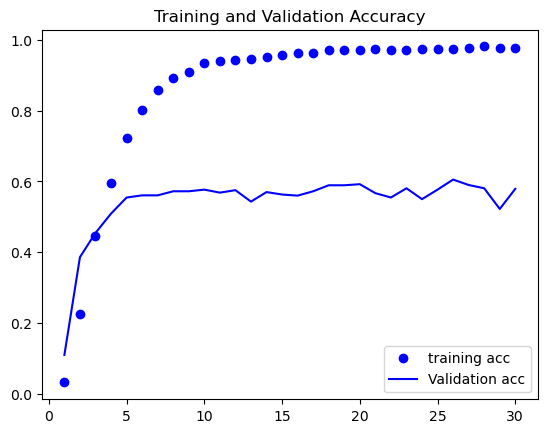

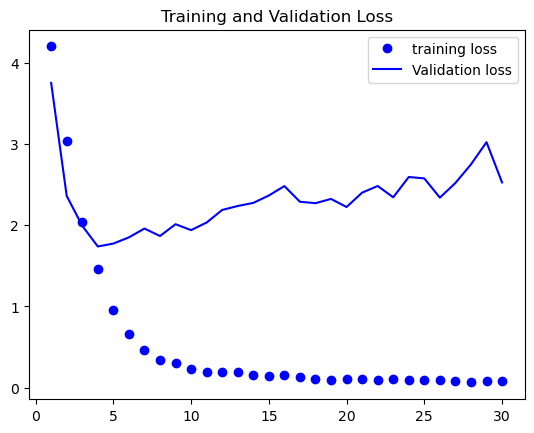

In [60]:
import matplotlib.pyplot as plt
#plotting the results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs , acc, 'bo',label ="training acc")
plt.plot(epochs , val_acc, 'b',label ="Validation acc")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

plt.plot(epochs , loss, 'bo',label ="training loss")
plt.plot(epochs , val_loss, 'b',label ="Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
modelv.save("Improved_Butterfly_Classification_Model.h5")

<h1>Visulizing The Results with the help of Gradio</h1>

In [4]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import gradio as gr
import numpy as np
from tensorflow.keras import models

In [5]:
model = models.load_model("ButterFlyModel2.h5")

In [6]:
label_list = [
    'SOUTHERN DOGFACE', 'ADONIS', 'BROWN SIPROETA', 'MONARCH',
    'GREEN CELLED CATTLEHEART', 'CAIRNS BIRDWING', 'EASTERN DAPPLE WHITE',
    'RED POSTMAN', 'MANGROVE SKIPPER', 'BLACK HAIRSTREAK', 'CABBAGE WHITE',
    'RED ADMIRAL', 'PAINTED LADY', 'PAPER KITE', 'SOOTYWING', 'PINE WHITE',
    'PEACOCK', 'CHECQUERED SKIPPER', 'JULIA', 'COMMON WOOD-NYMPH', 'BLUE MORPHO',
    'CLOUDED SULPHUR', 'STRAITED QUEEN', 'ORANGE OAKLEAF', 'PURPLISH COPPER',
    'ATALA', 'IPHICLUS SISTER', 'DANAID EGGFLY', 'LARGE MARBLE',
    'PIPEVINE SWALLOW', 'BLUE SPOTTED CROW', 'RED CRACKER', 'QUESTION MARK',
    'CRIMSON PATCH', 'BANDED PEACOCK', 'SCARCE SWALLOW', 'COPPER TAIL',
    'GREAT JAY', 'INDRA SWALLOW', 'VICEROY', 'MALACHITE', 'APPOLLO',
    'TWO BARRED FLASHER', 'MOURNING CLOAK', 'TROPICAL LEAFWING', 'POPINJAY',
    'ORANGE TIP', 'GOLD BANDED', 'BECKERS WHITE', 'RED SPOTTED PURPLE',
    'MILBERTS TORTOISESHELL', 'SILVER SPOT SKIPPER', 'AMERICAN SNOOT', 'AN 88',
    'ULYSES', 'COMMON BANDED AWL', 'CRECENT', 'METALMARK', 'SLEEPY ORANGE',
    'PURPLE HAIRSTREAK', 'ELBOWED PIERROT', 'GREAT EGGFLY', 'ORCHARD SWALLOW',
    'ZEBRA LONG WING', 'WOOD SATYR', 'MESTRA', 'EASTERN PINE ELFIN',
    'EASTERN COMA', 'YELLOW SWALLOW TAIL', 'CLEOPATRA', 'GREY HAIRSTREAK',
    'BANDED ORANGE HELICONIAN', 'AFRICAN GIANT SWALLOWTAIL', 'CHESTNUTQ',
    'CLODIUS PARNASSIAN'
]

sorted_labels = sorted(label_list)
print(sorted_labels)


['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BECKERS WHITE', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUTQ', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA', 'LARGE MARBLE', 'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA', 'METALMARK', 'MILBERTS TORTOISESHELL', 'MONARCH', 'MOURNING CLOAK', 'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW', 'PAINTED LADY', 'PAPER KITE', 'PEACOCK', 'PINE WHITE', 'PIPEVINE SWALLOW', 'POPINJAY', 'PURPLE HAIRSTREAK', 'PURPLISH COPPER', 'QUESTION MARK', 'RED ADMIR

In [8]:
def Classifying_Butterflies(image):
    img = Image.fromarray(image)
    img_array = img.resize((150,150))
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    max_index = np.argmax(prediction) # getting the index of the max value from the result array

    return "It is "+sorted_labels[max_index]

interface = gr.Interface(
    fn=Classifying_Butterflies,
    inputs='image',
    outputs='text',
    title='Butterfly Classifier',
    description='Upload an image of a butterfly and let the classifier identify it!'
)

interface.launch()


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 29ms/step
